# Dans ce problème, on va utiliser le Dataset : 

https://www.kaggle.com/saurabh00007/diabetescsv

#### — Ouvrir un data set à l’aide de pandas et récupérer un dataframe

In [134]:
import pandas as pd

# Charger le jeu de données dans un DataFrame Pandas
df = pd.read_csv("data/diabetes.csv")

In [246]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [136]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### — Connaitre les dimensions du dataframe

In [137]:
dimensions = df.shape
print("Dimensions du Dataframe :", dimensions)

Dimensions du Dataframe : (768, 9)


#### — Explorer la liste des colonnes

In [138]:
colonnes = df.columns
print("Liste des colonnes :", colonnes)

Liste des colonnes : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


#### — Récupérer une colonne, un ensemble de colonnes

In [139]:
age = df['Age']
bmi = df['BMI']
glucose = df['Glucose']

age_bmi = df[["Age", "BMI"]]

In [140]:
age.head()

0    50
1    31
2    32
3    21
4    33
Name: Age, dtype: int64

In [141]:
age_bmi.head()

,Age,BMI
0,50,33.6
1,31,26.6
2,32,23.3
3,21,28.1
4,33,43.1


#### — Le max, le min, la moyenne d’une colonne

In [142]:
max_glucose = glucose.max()
print("Max Glucose =", max_glucose)

min_glucose = glucose.min()
print("Min Glucose =", min_glucose)

moy_glucose = glucose.mean()
print("Moyenne Glucose: {:.2f}".format(moy_glucose))

Max Glucose = 199
Min Glucose = 0
Moyenne Glucose: 120.89


# Pour faire la classification, on se base sur la variable indépendante Glucose et la variable dépendante outcome de diabetes.csv

## 1. Quelles sont les principales étapes à suivre pour établir un modèle de Single Variate Logistic Regression basé sur sklearn ?

### => voici les étapes à suivre pour établir un modèle de régression logistique univariée en utilisant scikit-learn :

1. **Collecte de données** : Tout d'abord, rassemblez les données pertinentes pour votre étude. Assurez-vous d'avoir une variable dépendante binaire (variable à prédire) et une variable indépendante (caractéristique).

2. **Exploration des données** : Explorez vos données pour comprendre leur distribution et détecter d'éventuelles valeurs aberrantes ou données manquantes.

3. **Préparation des données** : Nettoyez vos données en supprimant les valeurs aberrantes, en traitant les données manquantes et en normalisant ou standardisant si nécessaire.

4. **Division des données** : Divisez vos données en deux ensembles distincts : l'ensemble d'apprentissage (généralement 70-80% des données) et l'ensemble de test (le reste). Cela vous permettra d'évaluer la performance du modèle.

5. **Création du modèle** : Utilisez la classe LogisticRegression de scikit-learn pour créer un modèle de régression logistique. Spécifiez la variable indépendante comme variable explicative et la variable dépendante comme variable cible.

6. **Entraînement du modèle** : Ajustez le modèle aux données d'apprentissage en utilisant la méthode fit(). Le modèle apprendra à partir des données pour effectuer des prédictions.

7. **Évaluation du modèle** : Utilisez l'ensemble de test pour évaluer la performance du modèle. Les métriques couramment utilisées incluent l'accuracy, la précision, le rappel, la F1-score et la matrice de confusion.

8. **Interprétation des résultats** : Interprétez les résultats pour comprendre comment le modèle se comporte par rapport à vos données. Analysez les coefficients pour comprendre l'impact de la variable indépendante sur la variable dépendante.

9. **Optimisation du modèle (si nécessaire)** : Si les performances du modèle ne sont pas satisfaisantes, vous pouvez explorer différentes techniques d'optimisation, telles que la sélection de caractéristiques, le réglage des hyperparamètres ou l'utilisation de techniques de régularisation.

10. **Utilisation du modèle** : Une fois que vous êtes satisfait de la performance du modèle, vous pouvez l'utiliser pour faire des prédictions sur de nouvelles données.

Ces étapes vous permettront de créer un modèle de régression logistique univariée à l'aide de scikit-learn. L'analyse et la compréhension des résultats sont essentielles pour tirer des conclusions pertinentes de votre modèle.

### => Voici les étapes pour créer un modèle de régression logistique univariée "from scratch" sans utiliser une bibliothèque comme scikit-learn :

 implémenter vous-même l'algorithme de régression logistique et les différentes fonctions nécessaires

1. **Collecte de données** : Rassemblez vos données, y compris la variable dépendante binaire et la variable indépendante.

2. **Initialisation des paramètres** : Initialisez les paramètres du modèle, y compris le coefficient de pente (poids) et le terme de biais (intercept). Vous pouvez les initialiser à zéro ou avec des valeurs aléatoires.

3. **Définition de la fonction logistique** : Implémentez une fonction logistique (sigmoid) qui prend en entrée une valeur et renvoie la probabilité que la variable dépendante soit égale à 1. La formule de la fonction logistique est : 

   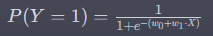

   Où \(w_0\) est le terme de biais, \(w_1\) est le poids de la variable indépendante X.

4. **Définition de la fonction de coût** : Implémentez une fonction de coût qui mesure l'erreur entre les prédictions du modèle et les valeurs réelles. Une fonction de coût couramment utilisée pour la régression logistique est la log-perte (log loss) ou l'entropie croisée (cross-entropy). La formule est la suivante :

    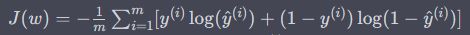

   Où \(m\) est le nombre d'échantillons, \(y^{(i)}\) est la vraie valeur de la variable dépendante pour l'échantillon \(i\), et \(\hat{y}^{(i)}\) est la prédiction du modèle.

5. **Mise à jour des paramètres** : Utilisez une technique d'optimisation, telle que la descente de gradient, pour mettre à jour les paramètres \(w_0\) et \(w_1\) afin de minimiser la fonction de coût.

6. **Entraînement du modèle** : Appliquez itérativement l'étape de mise à jour des paramètres sur l'ensemble de données d'apprentissage jusqu'à ce que la fonction de coût converge vers un minimum.

7. **Évaluation du modèle** : Évaluez la performance du modèle en utilisant l'ensemble de test ou de validation. Vous pouvez utiliser des métriques telles que l'accuracy, la précision, le rappel, la F1-score, etc.

8. **Interprétation des résultats** : Interprétez les coefficients obtenus ( \(w_0\) et \(w_1\) ) pour comprendre comment la variable indépendante affecte la variable dépendante.

9. **Utilisation du modèle** : Une fois que le modèle est entraîné et évalué avec succès, vous pouvez l'utiliser pour faire des prédictions sur de nouvelles données en utilisant la fonction logistique avec les paramètres appris.

10. **Optimisation (si nécessaire)** : Vous pouvez explorer différentes techniques d'optimisation, telles que l'ajustement des hyperparamètres ou l'utilisation de techniques de régularisation (comme la régularisation L1 ou L2), si le modèle nécessite des améliorations de performance.

La mise en œuvre de toutes ces étapes "from scratch" peut être un exercice instructif, mais cela peut être complexe. Vous devrez également gérer des détails tels que la gestion des données, la régularisation et la gestion des cas spéciaux. C'est pourquoi de nombreuses personnes préfèrent utiliser des bibliothèques comme scikit-learn pour gagner du temps et s'assurer de la qualité de l'implémentation.

## 2. Data

### (a) Définir le dataset (X,y) et les afficher

In [184]:
df = pd.read_csv("data/diabetes.csv")

In [185]:
X = df["Glucose"].values
y = df["Outcome"].values

### (b) Tracer les données à l’aide de matplotlib

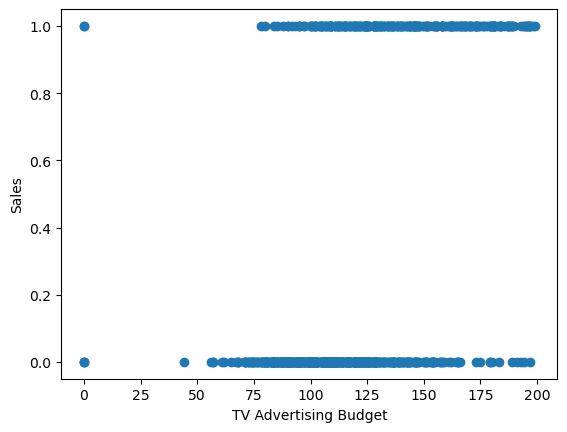

In [186]:
plt.scatter(X, y)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.show()

### (c) Conclusions ?

- La dispersion des points sur le graphique indique que les données de Glucose sont réparties en fonction de l'outcome.
- Il semble y avoir deux valeurs distinctes pour "Outcome" (peut-être 0 et 1), ce qui suggère une classification binaire.

### (d) à l’aide de train test split de sklearn.model selection, diviser le dataset en training dataset et test dataset (80% pour training data et 20% pour test data)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### (e) Pourquoi il faut séparer les données en données d’apprentissage et en données de test ?

La séparation des données en ensembles d'apprentissage et de test est essentielle pour évaluer la performance d'un modèle de machine learning. Voici pourquoi c'est important :

- Évaluation impartiale : En utilisant un ensemble de test distinct, vous pouvez évaluer la capacité du modèle à généraliser à de nouvelles données non vues auparavant.
- Prévention du surajustement (overfitting) : La division des données permet de détecter si le modèle s'ajuste trop bien aux données d'entraînement (overfitting) en fournissant une mesure de performance sur des données inconnues.
- Évaluation des performances réelles : Vous obtenez une estimation de la performance du modèle tel qu'il se comporterait dans la pratique.
- Optimisation des hyperparamètres : Vous pouvez ajuster les paramètres du modèle (par exemple, la régularisation) en utilisant l'ensemble d'entraînement tout en évaluant son efficacité sur l'ensemble de test.

La séparation des données en un ensemble d'apprentissage (training set) et un ensemble de test (test set) est une pratique essentielle dans le développement de modèles de machine learning, y compris les modèles de régression, pour plusieurs raisons importantes :

1. Évaluation de la généralisation : La principale raison de cette séparation est d'évaluer la capacité du modèle à généraliser à de nouvelles données non vues. En utilisant un ensemble de test distinct, vous simulez le scénario où le modèle est confronté à des données qu'il n'a pas encore rencontrées. Cela permet de vérifier si le modèle peut faire des prédictions précises en dehors de l'ensemble d'apprentissage.

2. Détection de surajustement : La séparation des données en ensembles distincts permet de détecter plus facilement le surajustement (overfitting). Le surajustement se produit lorsque le modèle s'ajuste trop précisément aux données d'apprentissage, ce qui peut entraîner de mauvaises performances sur de nouvelles données. En comparant les performances du modèle sur l'ensemble d'apprentissage et l'ensemble de test, vous pouvez identifier si le modèle surajuste ou sous-ajuste les données.

3. Estimation des performances du modèle : En évaluant le modèle sur l'ensemble de test, vous obtenez une estimation plus réaliste de ses performances en dehors de l'environnement d'apprentissage. Cela vous donne une idée de la qualité des prédictions que vous pouvez attendre lorsque le modèle est déployé dans la pratique.

4. Optimisation des hyperparamètres : Vous pouvez utiliser l'ensemble d'apprentissage pour ajuster les paramètres du modèle, puis utiliser l'ensemble de test pour évaluer ces paramètres et optimiser le modèle. Cela permet de choisir les valeurs d'hyperparamètres qui donnent les meilleures performances de généralisation.

5. Prévention de la fuite d'information : En gardant l'ensemble de test distinct de l'ensemble d'apprentissage, vous évitez la fuite d'information. La fuite d'information se produit lorsque des informations des données de test sont utilisées accidentellement lors de l'apprentissage du modèle, ce qui fausse les résultats de l'évaluation.

En résumé, la séparation des données en ensembles d'apprentissage et de test est une étape cruciale dans le développement de modèles de machine learning, car elle permet d'évaluer la capacité de généralisation du modèle et d'obtenir une estimation fiable de ses performances futures.

### (f) Afficher le nombre d’enregistrement pour le training et le nombre d’enregistrement pour le test

In [198]:
print("Nombre d’enregistrement pour le training :" , X_train.shape[0]) # len(X_train)
print("Nombre d’enregistrement pour le test :" , X_test.shape[0])

Nombre d’enregistrement pour le training : 614
Nombre d’enregistrement pour le test : 154


## 3. Modèle

### (a) Créer le modèle

Tout d'abord, vous devrez créer un modèle de régression logistique. Le modèle de régression logistique utilise une fonction logistique (sigmoid) pour modéliser la probabilité d'appartenance à une classe binaire. Vous devrez également définir une fonction d'hypothèse et une fonction de coût (par exemple, la perte logistique) pour entraîner le modèle.

In [233]:
import numpy as np

# Fonction logistique (sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialisation des paramètres du modèle
theta = np.zeros(X_train.shape[0])

# Fonction d'hypothèse
def hypothesis(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

# Fonction de coût (perte logistique)
def cost_function(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient de la fonction de coût
def gradient(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    grad = np.dot(X.T, (h - y)) / m
    return grad

### (b) Faire l’apprentissage

L'apprentissage consiste à ajuster les paramètres (coefficients) du modèle de régression logistique en minimisant la fonction de coût. Dans cet exemple, nous avons utilisé la descente de gradient pour mettre à jour les coefficients.

In [234]:
# Taux d'apprentissage et nombre d'itérations
alpha = 0.01
iterations = 1000

# Entraînement du modèle
for _ in range(iterations):
    grad = gradient(X_train, y_train, theta)
    theta -= alpha * grad

C:\Users\ayoub\AppData\Local\Temp\ipykernel_7480\2401996743.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


### (c) Afficher les coefficients

In [235]:
# Afficher les coefficients
print("Coefficients du modèle : ", theta)

Coefficients du modèle :  [-0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443 -0.1127443
 -0.1127443 -0.1127443 -0.1127443 -0

### (d) Tracer la fonction Logit (matplotlib)

C:\Users\ayoub\AppData\Local\Temp\ipykernel_7480\604852073.py:8: RuntimeWarning: invalid value encountered in log
  logit = np.log(x / (1 - x))


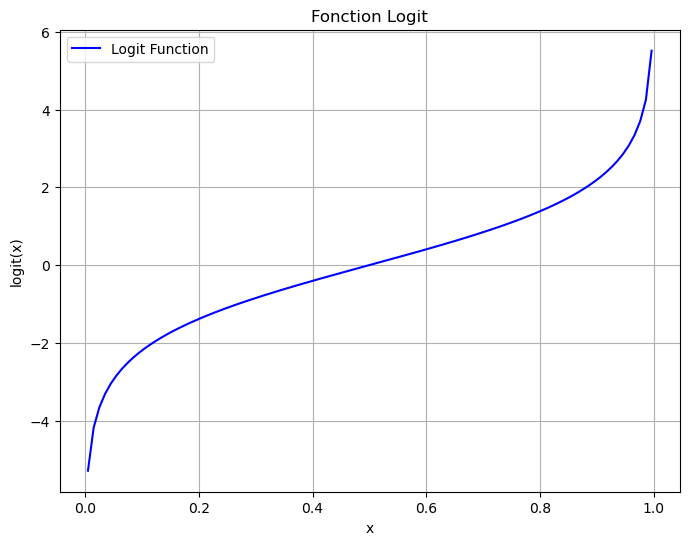

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# Définir une plage de valeurs pour x
x = np.linspace(-5, 5, 1000)

# Calculer la fonction Sigmoid pour chaque valeur de x
logit = np.log(x / (1 - x))

# Tracer la courbe Sigmoid
plt.figure(figsize=(8, 6))
plt.plot(x, logit, label="Logit Function", color="blue")
plt.xlabel("x")
plt.ylabel("logit(x)")
plt.title("Fonction Logit")
plt.grid(True)
plt.legend()
plt.show()

### (e) Tracer la fonction Sigmoid (matplotlib)

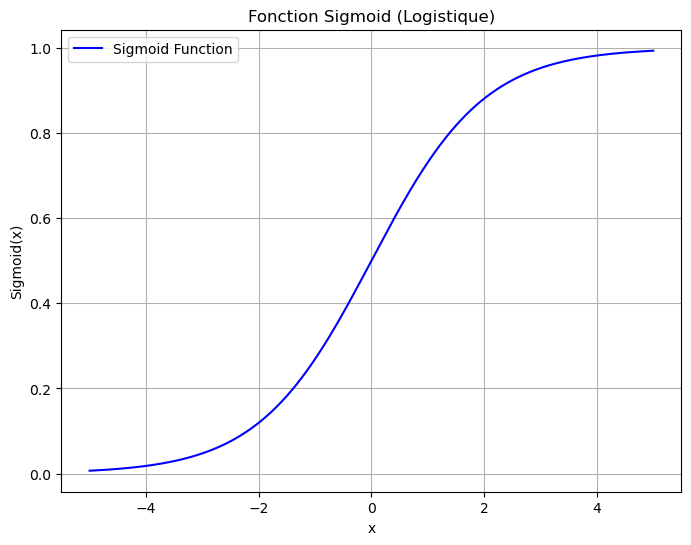

In [237]:
import numpy as np
import matplotlib.pyplot as plt

# Créer un ensemble de valeurs pour x
x = np.linspace(-5, 5, 1000)

# Calculer la fonction Sigmoid
sigmoid_ = 1 / (1 + np.exp(-x))

# Tracer la fonction Sigmoid
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid_, label="Sigmoid Function", color="blue")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.title("Fonction Sigmoid (Logistique)")
plt.grid(True)
plt.legend()
plt.show()

Les termes "Logit" et "Sigmoid" sont étroitement liés, mais ils désignent des concepts légèrement différents dans le contexte de la régression logistique. Voici la différence entre les deux :

1. **Sigmoid (Fonction Sigmoid)** :
   - La fonction Sigmoid, également connue sous le nom de fonction logistique, est une fonction mathématique utilisée pour transformer des valeurs réelles en valeurs dans l'intervalle [0, 1].
   - La formule de la fonction Sigmoid est : 1 / (1 + e^(-x)), où "x" est la variable d'entrée.
   - Elle est couramment utilisée dans la régression logistique pour modéliser la probabilité qu'une observation appartienne à une classe binaire. Elle prend des valeurs réelles en entrée et renvoie une probabilité.

2. **Logit (Fonction Logit)** :
   - Le logit est la fonction inverse de la fonction Sigmoid. Il transforme les probabilités (valeurs dans [0, 1]) en valeurs réelles.
   - La formule de la fonction logit est : log(p / (1 - p)), où "p" est la probabilité d'appartenance à la classe positive.
   - Le logit est utilisé pour effectuer une transformation linéaire sur les probabilités calculées par la régression logistique, ce qui permet de modéliser la relation entre les caractéristiques d'entrée et la variable de réponse.

En résumé, la fonction Sigmoid est utilisée pour calculer les probabilités dans la régression logistique, tandis que le logit est utilisé pour effectuer une transformation inverse afin de modéliser la relation entre les caractéristiques et la probabilité. Ensemble, ils sont essentiels pour créer un modèle de régression logistique efficace pour la classification binaire.

### (f) En utilisant les coefficients trouvés par l’algorithme :

#### i. Ecrire l’expression mathématique pour faire la prédiction pour une personne ayant le glucose 197  

prédiction = sigmoid(theta[0] + theta[1] * 197)

#### ii. Calculer la sortie de cette valeur (à l’aide de python) et comment l’interpréter

Vous pouvez calculer la sortie pour cette valeur en utilisant les coefficients trouvés et l'expression mathématique. Ensuite, interprétez le résultat. Si la prédiction est proche de 1, cela signifie que la personne a une forte probabilité d'être dans la classe positive (1), sinon, elle est dans la classe négative (0).

In [281]:
prediction = sigmoid(theta[0] + theta[1] * 197)
print(prediction)
print("Prediction : {:.2f}%".format(prediction * 100))

2.0187521928326e-10
Prediction : 0.00%


#### iii. A quelle classe appartient cette personne ?

Pour déterminer la classe, vous pouvez définir un seuil (par exemple, 0,5) et considérer que si la prédiction est supérieure à ce seuil, la personne appartient à la classe positive, sinon, à la classe négative.

In [282]:
if(prediction >= 0.5):
    print("la personne appartient à la classe positive")
else:
    print("la personne appartient à la classe négative")

la personne appartient à la classe négative


### (g) En utilisant les coefficients trouvés par l’algorithme :

#### i. Ecrire l’expression mathématique pour faire la prédiction pour un ensemble de personnes ayant le glucose respectivement [110,139,100,84,44]

In [283]:
def sigmoid_list(list):
    for i in range(len(list)):
        prediction = sigmoid(theta[0] + theta[1] * i)
        print("Prediction : {} | {:.2f}%".format(prediction, prediction * 100))

#### ii. Calculer la sortie pour l’ensemble des valeurs (à l’aide de python) et interpréter le résultat obtenu

In [284]:
list = [110,139,100,84,44]
sigmoid_list(list)

Prediction : 0.4718437439291694 | 47.18%
Prediction : 0.4438654959293932 | 44.39%
Prediction : 0.41623879077773784 | 41.62%
Prediction : 0.38912845344019253 | 38.91%
Prediction : 0.3626868148399018 | 36.27%


#### A quelle classe appartient chaque personne ?

In [310]:
def classe(list):
    lists=[]
    for i in range(len(list)):
        prediction = sigmoid(theta[0] + theta[1] * i)
        if(prediction >= 0.5):
            print("la personne n:", i, " appartient à la classe positive")
            lists.append(1)
        else:
            print("la personne n:", i, " appartient à la classe négative")
            lists.append(0)
    return lists

In [311]:
list_pred = classe(list)
list_pred

la personne n: 0  appartient à la classe négative
la personne n: 1  appartient à la classe négative
la personne n: 2  appartient à la classe négative
la personne n: 3  appartient à la classe négative
la personne n: 4  appartient à la classe négative


[0, 0, 0, 0, 0]

## 4. Evaluation  ́

### (a) Soit la matrice de confusion suivante :

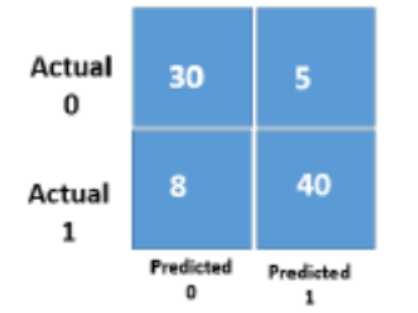

Quelles sont les valeurs de FP, TP, FN, TN ?

La matrice de confusion est généralement représentée comme suit :

```
[VP (Vrais Positifs)  FN (Faux Négatifs)]
[FP (Faux Positifs)  VN (Vrais Négatifs)]
```

Dans la matrice de confusion que vous avez fournie :

```
[30  5]
[ 8 40]
```

- FP (Faux Positifs) : 8
- TP (Vrais Positifs) : 30
- FN (Faux Négatifs) : 5
- TN (Vrais Négatifs) : 40

Ces valeurs représentent le nombre d'observations correctement classées ou mal classées par un modèle de classification binaire.

### (b) Soit les deux vecteurs suivants :

#### i. Trouver la matrice de confusion  ́equivalente aux vecteurs ci-dessus.

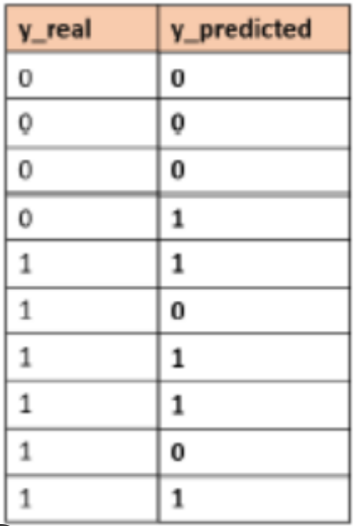
Pour trouver la matrice de confusion équivalente aux deux vecteurs `(y_real, y_predicted)`, vous pouvez suivre les étapes suivantes en comptant les valeurs correspondantes dans les vecteurs :

Vecteur `y_real` : [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Vecteur `y_predicted` : [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1]

La matrice de confusion sera la suivante :

```
[VP  FN]
[FP  VN]
```

- VP (Vrais Positifs) : Le nombre d'observations pour lesquelles `y_real` et `y_predicted` sont tous deux égaux à 1. Dans ce cas, VP = 4.
- FN (Faux Négatifs) : Le nombre d'observations pour lesquelles `y_real` est égal à 1 et `y_predicted` est égal à 0. FN = 2.
- FP (Faux Positifs) : Le nombre d'observations pour lesquelles `y_real` est égal à 0 et `y_predicted` est égal à 1. FP = 1.
- VN (Vrais Négatifs) : Le nombre d'observations pour lesquelles `y_real` et `y_predicted` sont tous deux égaux à 0. VN = 3.

Donc, la matrice de confusion équivalente est la suivante :

```
[4 2]
[1 3]
```

#### ii. Ecrire une fonction en python qui retourne une matrice de confusion. Tester cette fonction en utilisant les deux vecteurs de la question précédente

In [279]:
def confusion_matrix(y_real, y_predicted):
    TP = sum((y_real[i] == 1) and (y_predicted[i] == 1) for i in range(len(y_real)))
    TN = sum((y_real[i] == 0) and (y_predicted[i] == 0) for i in range(len(y_real)))
    FP = sum((y_real[i] == 0) and (y_predicted[i] == 1) for i in range(len(y_real)))
    FN = sum((y_real[i] == 1) and (y_predicted[i] == 0) for i in range(len(y_real)))
    return np.array([[TP, FN], [FP, TN]])

In [352]:
y_real =      [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
y_predicted = [0, 0, 0, 1, 1, 0, 1, 1, 0, 1]

confusion = confusion_matrix(y_real, y_predicted)
print(confusion)

[[3 1]
 [2 4]]


### (c) Matrice de confusion du modèle :

#### i. A l’aide de sklearn.metrics, afficher la matrice de confusion du modèle trouvé en Q3 

In [353]:
list_pred = classe(X_train)
list_pred

la personne n: 0  appartient à la classe négative
la personne n: 1  appartient à la classe négative
la personne n: 2  appartient à la classe négative
la personne n: 3  appartient à la classe négative
la personne n: 4  appartient à la classe négative
la personne n: 5  appartient à la classe négative
la personne n: 6  appartient à la classe négative
la personne n: 7  appartient à la classe négative
la personne n: 8  appartient à la classe négative
la personne n: 9  appartient à la classe négative
la personne n: 10  appartient à la classe négative
la personne n: 11  appartient à la classe négative
la personne n: 12  appartient à la classe négative
la personne n: 13  appartient à la classe négative
la personne n: 14  appartient à la classe négative
la personne n: 15  appartient à la classe négative
la personne n: 16  appartient à la classe négative
la personne n: 17  appartient à la classe négative
la personne n: 18  appartient à la classe négative
la personne n: 19  appartient à la classe

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [354]:
def to_nbr(y):
    list=[]
    for i in range(len(y)):
        if y[i]>0.5:
            list.append(1)
        else:
            list.append(0)
    return list

In [355]:
y_true =  to_nbr(y_train)

In [356]:
from sklearn.metrics import confusion_matrix

# Supposons que y_true soit le vecteur réel et y_pred soit le vecteur prédit par votre modèle "from scratch"
confusion = confusion_matrix(y_true, list_pred)
print(confusion)

[[401   0]
 [213   0]]


#### ii. Retourner la meme matrice en utilisant votre fonction

In [357]:
confusion = confusion_matrix(y_true, list_pred)
print(confusion)

[[401   0]
 [213   0]]


In [358]:
X.shape

(100,)

### (d) Que signifie accuracy metric ?

La formule de accuracy : 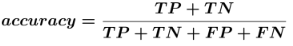 
pour une classification binaire

#### i. Pour la matrice de confusion en 4.c, calculer accuracy du modèle trouvé en Q3

In [359]:
def accuracy(confusion):
    TP = confusion[0,0]
    TN = confusion[0,1]
    FN = confusion[1,1]
    FP = confusion[1,0]
    return (TP+TN)/(TP+TN+FP+FN)

In [360]:
accuracy(confusion)

0.6530944625407166

#### ii. A l’aide de sklearn.metrics.accuracy_score, calculer accuracy du modèle trouvé en Q3

In [361]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, list_pred)
accuracy

0.6530944625407166

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# -----------------------------------------From Scratch [34.9%]-----------------------------------------

### 1.1. Importez les bibliothèques nécessaires :

Vous aurez besoin de la bibliothèque NumPy pour les opérations mathématiques et Pandas pour charger et manipuler les données. Assurez-vous d'avoir ces bibliothèques installées.

In [143]:
import numpy as np
import pandas as pd

### 1.2. Chargez le jeu de données :

Utilisez Pandas pour charger le jeu de données "diabetes.csv" dans un DataFrame.

In [144]:
df = pd.read_csv("data/diabetes.csv")

### 1.3. Sélectionnez les données pertinentes :

Sélectionnez les colonnes "Glucose" comme variable indépendante (caractéristique) et "outcome" comme variable dépendante (étiquette) du DataFrame.

In [145]:
X = df["Glucose"].values
y = df["Outcome"].values

### 1.4. Définissez la fonction de régression logistique :

Créez une fonction de régression logistique qui prend en compte les paramètres du modèle, les données d'entrée et renvoie les prédictions.

In [146]:
def logistic_regression(X, theta):
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))

La fonction `logistic_regression` que vous avez présentée est une fonction qui implémente la régression logistique dans le contexte d'une tâche de classification binaire (deux classes : 0 ou 1). Voici une explication de cette fonction :

- `X` : C'est la matrice des caractéristiques (features) de vos données. Chaque ligne de cette matrice correspond à une observation (par exemple, un ensemble de données médicales pour un patient), et chaque colonne correspond à une caractéristique (par exemple, "Glucose" dans votre cas). Cette matrice est de dimension (m x n), où "m" est le nombre d'observations et "n" est le nombre de caractéristiques.

- `theta` : C'est un vecteur de paramètres du modèle de régression logistique. Chaque caractéristique a un poids associé dans ce vecteur qui sera optimisé pendant l'apprentissage du modèle.

La fonction réalise les étapes suivantes :

1. Calcul de la valeur "z" : La première étape consiste à calculer la valeur "z" en effectuant un produit scalaire (dot product) entre la matrice des caractéristiques "X" et le vecteur des paramètres "theta". Le produit scalaire est une somme pondérée des caractéristiques, où chaque caractéristique est multipliée par son poids correspondant dans "theta". Cela représente la combinaison linéaire des caractéristiques.

2. Calcul de la probabilité : Ensuite, la fonction calcule la probabilité que la variable dépendante (la classe) soit égale à 1 en utilisant la fonction logistique (sigmoid) : 1 / (1 + exp(-z)). La fonction sigmoid transforme la valeur "z" en une valeur comprise entre 0 et 1. Plus précisément, elle transforme la combinaison linéaire des caractéristiques en une probabilité.

- Lorsque z est grand et positif, la probabilité tend vers 1.
- Lorsque z est grand et négatif, la probabilité tend vers 0.
- Lorsque z est proche de zéro, la probabilité est proche de 0.5.

Cela signifie que la régression logistique attribue une probabilité à chaque observation d'appartenir à la classe positive (dans votre cas, "outcome" égal à 1).

En résumé, la fonction `logistic_regression` calcule la probabilité qu'une observation donnée appartienne à la classe positive (1) en fonction de ses caractéristiques et des paramètres du modèle. Cette probabilité est ensuite utilisée pour prendre des décisions de classification, par exemple, en choisissant la classe qui a la probabilité la plus élevée.

### 1.5. Définissez la fonction de coût (log-perte) :

Créez une fonction de coût pour évaluer la performance du modèle.

In [147]:
def cost_function(y_true, y_pred):
    m = len(y_true)
    cost = (-1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return cost

### 1.6. Initialisez les paramètres du modèle :

Initialisez les paramètres du modèle (poids) de manière aléatoire ou à zéro.

In [148]:
theta = np.zeros(X.shape[0])

### 1.7. Entraînez le modèle :

Utilisez la descente de gradient pour optimiser les paramètres du modèle en minimisant la fonction de coût.

In [149]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        y_pred = logistic_regression(X, theta)
        gradient = np.dot(X.T, (y_pred - y)) / m   # une implémentation de la mise à jour des paramètres du modèle à l'aide de la descente de gradient
        theta -= learning_rate * gradient
    return theta

Cette ligne de code est en réalité . Permettez-moi de clarifier ce que fait cette ligne :

La formule de mise à jour des paramètres dans la descente de gradient pour la régression logistique est basée sur le gradient de la fonction de coût. La ligne de code en question calcule le gradient de la fonction de coût par rapport aux paramètres (poids) du modèle.

Voici une explication plus détaillée :

- `X` est la matrice des caractéristiques, où chaque ligne représente un exemple et chaque colonne représente une caractéristique. `X.T` est la transposée de cette matrice, ce qui signifie que chaque ligne représente maintenant une caractéristique et chaque colonne représente un exemple.

- `y_pred` est le vecteur des prédictions faites par le modèle de régression logistique pour chaque exemple dans l'ensemble de données.

- `y` est le vecteur des étiquettes réelles (0 ou 1) pour chaque exemple dans l'ensemble de données.

- `m` est le nombre total d'exemples dans l'ensemble de données.

La ligne de code effectue la multiplication matricielle entre la transposée de `X` et la différence entre les prédictions (`y_pred`) et les étiquettes réelles (`y`). Ensuite, la division par `m` calcule la moyenne du gradient pour chaque paramètre du modèle.

Essentiellement, cette ligne de code calcule comment chaque paramètre du modèle (poids) doit être mis à jour pour minimiser la fonction de coût. Cela fait partie de la procédure de la descente de gradient, où les poids du modèle sont ajustés itérativement pour converger vers une solution optimale.

En résumé, cette ligne de code calcule le gradient de la fonction de coût par rapport aux paramètres du modèle, ce qui est essentiel pour mettre à jour ces paramètres lors de l'apprentissage du modèle de régression logistique.

La formule en question peut être réécrite sous forme mathématique comme suit :

La descente de gradient pour la régression logistique consiste à mettre à jour itérativement les paramètres du modèle (représentés par le vecteur θ) en utilisant le gradient de la fonction de coût (J(θ)) par rapport à ces paramètres. Le vecteur θ contient les poids associés à chaque caractéristique.

La formule pour la mise à jour des paramètres est la suivante :

θ := θ - (α / m) * X^T * (hθ(X) - y)

- θ représente le vecteur de poids du modèle.
- α est le taux d'apprentissage (learning rate), qui contrôle la taille des pas que nous faisons lors de la descente de gradient.
- m est le nombre total d'exemples dans l'ensemble de données.
- X est la matrice des caractéristiques, où chaque ligne représente un exemple et chaque colonne représente une caractéristique. X^T est la transposée de cette matrice.
- hθ(X) est la fonction logistique, qui est l'hypothèse du modèle pour la régression logistique. Elle calcule les probabilités de l'étiquette positive (1) pour chaque exemple.
- y est le vecteur des étiquettes réelles (0 ou 1) pour chaque exemple.

La formule calcule le gradient de la fonction de coût par rapport aux paramètres θ, puis ajuste les paramètres en soustrayant ce gradient multiplié par le taux d'apprentissage (α) et divisé par le nombre d'exemples (m).

En utilisant la notation de la question initiale :

gradient = (1 / m) * X^T * (y_pred - y)

J'espère que cette reformulation sous forme mathématique clarifie la signification de la ligne de code.

La formule de base pour la mise à jour des paramètres (poids) dans la descente de gradient pour la régression logistique est la suivante :

θ := θ - α * (∂J(θ) / ∂θ)

Où :
- θ représente le vecteur de poids du modèle.
- α est le taux d'apprentissage (learning rate).
- J(θ) est la fonction de coût que vous essayez de minimiser.
- (∂J(θ) / ∂θ) est le gradient de la fonction de coût par rapport aux paramètres θ.

En utilisant cette formule, vous itérez sur votre ensemble de données, calculez le gradient de la fonction de coût par rapport aux paramètres actuels, et ajustez les paramètres en fonction du taux d'apprentissage.

Pour la régression logistique, la fonction de coût J(θ) est généralement définie comme la log-perte (log loss) ou entropie croisée (cross-entropy) en fonction des prédictions du modèle et des étiquettes réelles.

La formule que j'ai fournie dans ma réponse précédente était une mise en œuvre plus détaillée de cette mise à jour des paramètres spécifiquement pour la régression logistique en utilisant la log-perte. La formule mathématique générale est celle que je viens de donner ci-dessus.

La transposée de X, notée X^T, est utilisée dans la descente de gradient pour la régression logistique (et dans de nombreuses autres techniques d'apprentissage automatique) pour les raisons suivantes :

1. **Dimensionnalité des données** : Les données sont généralement organisées de telle sorte que chaque exemple (chaque ligne) est représenté par un vecteur de caractéristiques, et chaque caractéristique est une colonne distincte. Dans ce format, la multiplication matricielle entre la matrice des caractéristiques (X) et le vecteur de poids (θ) nécessite que X^T soit utilisée pour s'assurer que les dimensions sont correctes. La transposée de X permet de s'assurer que les opérations mathématiques sont compatibles.

2. **Multiplication de matrices** : Pour calculer le gradient de la fonction de coût par rapport aux poids, il est nécessaire de multiplier la matrice des caractéristiques (X) par la différence entre les prédictions du modèle (hθ(X)) et les étiquettes réelles (y). Pour que cette opération de multiplication soit valide, il faut que le nombre de colonnes de X soit égal au nombre de lignes de la différence (hθ(X) - y), ce qui est réalisé par la transposée X^T.

3. **Efficacité numérique** : La transposée de X permet également d'optimiser les calculs, car elle permet de mettre en forme les données de manière à effectuer des opérations mathématiques plus efficaces. Dans de nombreux cas, les bibliothèques de calcul numérique, telles que NumPy, sont optimisées pour tirer parti de cette structure de données pour accélérer les calculs.

En résumé, la transposée de X (X^T) est utilisée pour s'assurer que les opérations de multiplication matricielle dans la descente de gradient sont compatibles et que les calculs sont effectués de manière efficace et numériquement stable. C'est une étape importante dans le processus d'apprentissage du modèle de régression logistique.

La notation "hθ(X)" représente l'hypothèse (ou la fonction hypothèse) de la régression logistique. En termes simples, c'est la fonction qui prend les caractéristiques d'un exemple (X) en entrée et produit une estimation de la probabilité que cet exemple appartienne à la classe positive (généralement étiquetée comme "1" dans la régression logistique).

La formule générale de l'hypothèse pour la régression logistique est la suivante :

hθ(X) = 1 / (1 + e^(-z))

Où :
- hθ(X) est la probabilité que l'exemple X appartienne à la classe positive.
- θ est le vecteur de poids (paramètres) du modèle.
- X représente le vecteur de caractéristiques de l'exemple.
- e est la base du logarithme naturel (environ 2.71828).
- z est le produit scalaire de θ et X, c'est-à-dire z = θ^T * X, où ^T représente la transposée.

La fonction logistique, également appelée fonction sigmoïde, est utilisée pour transformer le produit scalaire θ^T * X en une valeur comprise entre 0 et 1. Cette valeur représente la probabilité que l'exemple X appartienne à la classe positive.

La régression logistique utilise ensuite cette probabilité pour prendre des décisions de classification. Par exemple, si hθ(X) est supérieur à 0,5, l'exemple est généralement classé comme appartenant à la classe positive (1), sinon il est classé comme n'appartenant pas à la classe positive (0).

En résumé, "hθ(X)" est la fonction qui modélise la relation entre les caractéristiques (X) et les probabilités de classe dans la régression logistique. Elle est essentielle pour les prédictions de classification de la régression logistique.

La formule de la descente de gradient pour la régression logistique n'inclut pas explicitement une somme, mais elle repose sur la somme implicite qui se produit lors du calcul du gradient de la fonction de coût pour tous les exemples de l'ensemble de données. La somme est inhérente à la manière dont le gradient est calculé pour chaque paramètre du modèle.

In [150]:
num_iterations = 1000
learning_rate = 0.01
theta = gradient_descent(X, y, theta, learning_rate, num_iterations)

C:\Users\ayoub\AppData\Local\Temp\ipykernel_7480\2348299280.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


### 1.8. Faites des prédiction :

Utilisez les paramètres entraînés pour faire des prédictions sur de nouvelles données.

In [151]:
y_pred = logistic_regression(X, theta)

In [152]:
# Affichez les prédictions
print("Prédictions :", y_pred)

Prédictions : 1.0


In [153]:
# Prédiction
predictions = (y_pred >= 0.5).astype(int)

# Évaluation du modèle
accuracy = np.mean(predictions == y)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

Précision du modèle : 34.90%


ValueError: x and y must be the same size

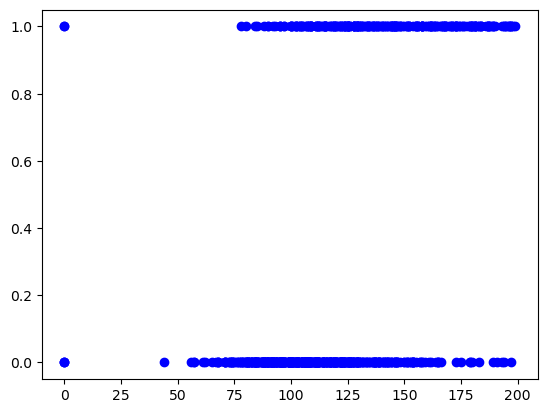

In [154]:
import matplotlib.pyplot as plt

# Visualisation
plt.scatter(X, y, c='b', marker='o', label='Classe 0')
plt.scatter(X, predictions, c='r', marker='x', label='Prédiction')
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.legend()
plt.show()

### 1.9. Évaluez le modèle :

Vous pouvez évaluer le modèle en calculant des métriques de performance, telles que la précision, le rappel, le F1-score, et en traçant la courbe ROC si cela est applicable à votre problème. Vous devrez également définir un seuil pour décider de la classe prédite (0 ou 1).

In [155]:
def predict(y_pred, threshold=0.5):
    return (y_pred >= threshold).astype(int)

threshold = 0.5
y_predicted = predict(y_pred, threshold)

In [156]:
y_predicted

1

Vous pouvez ensuite comparer y_predicted avec les étiquettes réelles y pour évaluer la performance du modèle.

Vous pouvez évaluer la performance du modèle en utilisant des métriques telles que la précision, le rappel, le F1-score, etc.

   Cependant, gardez à l'esprit que la mise en œuvre "from scratch" de la régression logistique peut être plus complexe et exigeante en termes de gestion des détails mathématiques et de manipulation des données que l'utilisation de bibliothèques telles que Scikit-Learn. Il est recommandé de comprendre en profondeur les concepts mathématiques sous-jacents à la régression logistique avant de créer votre propre modèle "from scratch".

#  ------------------------------------------From Scratch [59%]------------------------------------------

In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Génération de données fictives
np.random.seed(0)
X = np.random.normal(5, 1, 100)  # Variable indépendante (Glucose)
y = np.random.choice([0, 1], size=100)  # Variable dépendante (Outcome)

# Définition des fonctions (comme expliqué précédemment)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(y, y_pred):
    m = len(y)
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

def predict(X, w, b):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    return y_pred

# Entraînement du modèle
w = 0  # Poids initial
b = 0  # Biais initial

learning_rate = 0.01
num_iterations = 1000

for i in range(num_iterations):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    dw = (1/len(y)) * np.dot(X.T, (y_pred - y))
    db = (1/len(y)) * np.sum(y_pred - y)
    
    w -= learning_rate * dw
    b -= learning_rate * db
    
    cost = compute_cost(y, y_pred)
    if i % 100 == 0:
        print(f"Iteration {i}, Coût : {cost}")

Iteration 0, Coût : 0.6931471805599453
Iteration 100, Coût : 0.6759687297129932
Iteration 200, Coût : 0.6759680860333397
Iteration 300, Coût : 0.6759674707970916
Iteration 400, Coût : 0.6759668664376076
Iteration 500, Coût : 0.6759662727625931
Iteration 600, Coût : 0.675965689583172
Iteration 700, Coût : 0.6759651167138057
Iteration 800, Coût : 0.675964553972235
Iteration 900, Coût : 0.6759640011794222


In [158]:
# Prédiction
y_pred1 = logistic_regression(X, w) # probabilities = predict(np.array(X), w, b)
predictions = (y_pred1 >= 0.5).astype(int)

# Évaluation du modèle
accuracy = np.mean(predictions == y)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

Précision du modèle : 59.00%


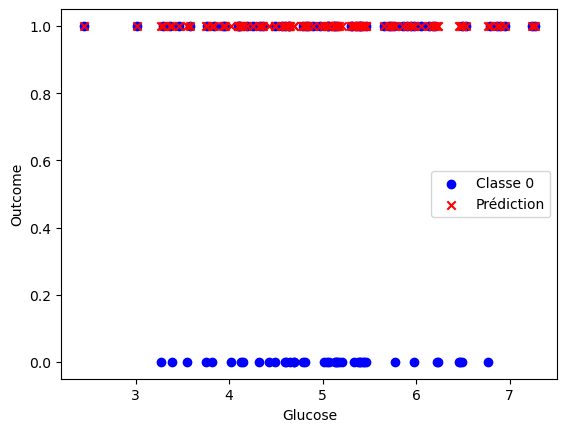

In [159]:
# Visualisation
plt.scatter(X, y, c='b', marker='o', label='Classe 0')
plt.scatter(X, predictions, c='r', marker='x', label='Prédiction')
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.legend()
plt.show()

#  ----------------------------------------From Scratch [65.37%]----------------------------------------

In [164]:
import numpy as np
import pandas as pd

df = pd.read_csv("data/diabetes.csv")

X = df["Glucose"].values
y = df["Outcome"].values

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

weight = 0.0
bias = 0.0

def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.maximum(epsilon, y_pred)
    y_pred = np.minimum(1 - epsilon, y_pred)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

learning_rate = 0.01
num_iterations = 1000

for i in range(num_iterations):
    z = weight * X + bias
    predictions = sigmoid(z)
    loss = log_loss(y, predictions)

    dw = (1 / len(X)) * np.dot(X, (predictions - y))
    db = (1 / len(X)) * np.sum(predictions - y)

    weight -= learning_rate * dw
    bias -= learning_rate * db

    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss}")

print(f"Final weight: {weight}")
print(f"Final bias: {bias}")

def predict(X, weight, bias):
    z = weight * X + bias
    return sigmoid(z)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# new_data_point = 150  # Remplacez par la valeur de "Glucose" que vous souhaitez prédire
y_pred2 = predict(X_test, weight, bias)
# print(f"Prédiction pour Glucose {X}: {prediction}")

Iteration 0: Loss = 0.6931471805599453
Iteration 100: Loss = 9.953030263895934
Iteration 200: Loss = 11.967093370809257
Iteration 300: Loss = 1.90927484396557
Iteration 400: Loss = 11.967051131222684
Iteration 500: Loss = 11.559210713375288
Iteration 600: Loss = 21.933348389722596
Iteration 700: Loss = 11.930200520171615
Iteration 800: Loss = 0.9517721329109007
Iteration 900: Loss = 17.626870132209344
Final weight: -0.649643204061471
Final bias: -0.6009675675528827


In [165]:
# Prédiction
predictions = (y_pred2 >= 0.5).astype(int)

# Évaluation du modèle
accuracy = np.mean(predictions == y_test)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

Précision du modèle : 65.37%


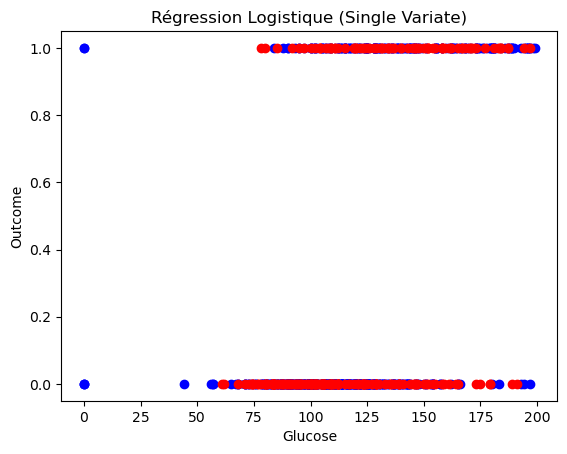

In [166]:
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
# plt.plot(X, model.predict(X), color='black', linewidth=3)
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.title("Régression Logistique (Single Variate)")
plt.show()

# -------------------------------------Using third-party solutions-------------------------------------

### 1.1. Importez les bibliothèques nécessaires :

Importez les bibliothèques nécessaires, y compris Pandas pour la manipulation des données, Scikit-Learn pour la création du modèle, et Matplotlib si vous souhaitez visualiser les résultats.

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plts

### 1.2. Chargez le jeu de données :

Utilisez Pandas pour charger le jeu de données "diabetes.csv" dans un DataFrame.

In [168]:
df = pd.read_csv("data/diabetes.csv")

### 1.3. Sélectionnez les données pertinentes :

Sélectionnez les colonnes "Glucose" comme variable indépendante (caractéristique) et "outcome" comme variable dépendante (étiquette) du DataFrame.

In [169]:
X = df[["Glucose"]]
y = df["Outcome"]

### 1.4. Divisez les données en ensembles d'apprentissage et de test :

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Les arguments `test_size` et `random_state` sont couramment utilisés lors de la division d'un ensemble de données en ensembles d'apprentissage et de test dans le cadre de l'apprentissage automatique. Voici ce que ces arguments signifient :

1. `test_size` : C'est le paramètre qui détermine la proportion de l'ensemble de données qui sera réservée pour l'ensemble de test. Dans cet exemple, `test_size=0.2` signifie que 20 % de l'ensemble de données sera utilisé comme ensemble de test, et 80 % sera utilisé comme ensemble d'apprentissage. Le choix de cette proportion dépend souvent de la taille de l'ensemble de données et des besoins spécifiques du problème. Une division courante est 70-30 ou 80-20.

2. `random_state` : C'est une valeur de graine (seed) pour le générateur de nombres aléatoires. Lorsque vous divisez votre ensemble de données en ensembles d'apprentissage et de test de manière aléatoire, vous souhaitez généralement que cette division soit reproductible. En fixant `random_state` à une valeur spécifique (comme `random_state=42`), vous garantissez que la division sera la même chaque fois que vous exécutez le code. Cela est utile pour la reproductibilité des résultats et pour déboguer votre modèle. Vous pouvez choisir n'importe quelle valeur pour `random_state`, tant que vous l'utilisez de manière cohérente.

Le choix de la valeur de `random_state` est généralement arbitraire, mais il est courant d'utiliser des valeurs telles que 42, 0, 1 ou tout autre nombre entier. L'important est de s'assurer que la division des données reste cohérente d'une exécution à l'autre, de manière à ce que vous puissiez comparer et évaluer votre modèle de manière reproductible.

### 1.5. Créez le modèle de régression logistique :

In [171]:
model = LogisticRegression()

### 1.6. Entraînez le modèle :

Utilisez les données d'apprentissage pour entraîner le modèle.

In [172]:
model.fit(X_train, y_train)

LogisticRegression()

In [176]:
# Affichez les coefficients du modèle.
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [[0.04033676]]
Intercept:  [-5.6523997]


### 1.7. Prédisez les étiquettes pour l'ensemble de test :

Utilisez le modèle pour prédire les étiquettes de l'ensemble de test.

In [173]:
y_pred = model.predict(X_test)

### 1.8. Évaluez la performance du modèle :

Évaluez la performance du modèle en utilisant des métriques telles que la matrice de confusion, le rapport de classification, et la précision, le rappel, le F1-score, etc.

In [174]:
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Matrice de confusion :
[[128  23]
 [ 41  39]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       151
           1       0.63      0.49      0.55        80

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.67       231
weighted avg       0.71      0.72      0.71       231



### 1.9. Visualisez les résultats (facultatif) :

Vous pouvez également visualiser les résultats en traçant la régression logistique avec les données d'entraînement et les points de données d'essai.

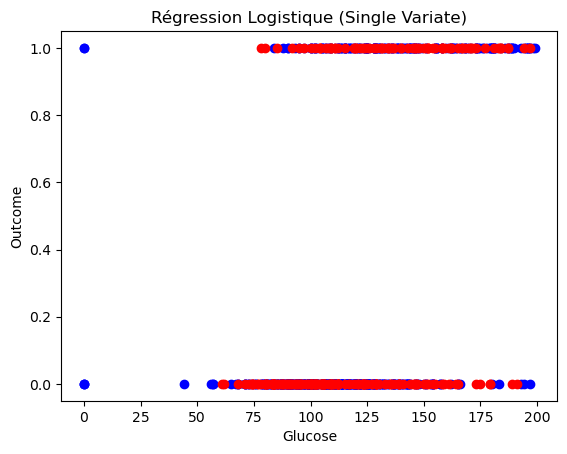

In [175]:
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
# plt.plot(X, model.predict(X), color='black', linewidth=3)
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.title("Régression Logistique (Single Variate)")
plt.show()

La visualisation des résultats d'un modèle de régression logistique univariée peut aider à mieux comprendre comment le modèle prend des décisions et comment il se comporte par rapport aux données d'entraînement et de test. Dans l'exemple donné précédemment, nous avons tracé la régression logistique et les points de données pour visualiser les résultats. Voici une explication plus détaillée de cette visualisation :

1. **Points de données d'entraînement et de test** : Les points de données d'entraînement et de test sont affichés sur le graphique. Les points d'entraînement sont en bleu, tandis que les points de test sont en rouge. Cela permet de visualiser comment le modèle a été ajusté aux données d'entraînement et comment il se généralise aux données de test.

2. **Régression logistique** : La ligne noire représente la régression logistique, qui est l'ajustement du modèle aux données. En utilisant la variable "Glucose" comme caractéristique, la régression logistique modélise la probabilité que la variable "outcome" soit égale à 1 (par exemple, diabétique) en fonction de la valeur de "Glucose". Cette courbe illustre comment le modèle classe les données en fonction de cette probabilité.

3. **Axe des X** : L'axe horizontal représente les valeurs de la variable "Glucose", qui est la caractéristique que nous utilisons pour effectuer la prédiction.

4. **Axe des Y** : L'axe vertical représente les valeurs de la variable "Outcome", qui est la variable que nous essayons de prédire. Dans cet exemple, "Outcome" est une variable binaire, donc elle peut prendre deux valeurs : 0 ou 1.

La régression logistique tente de trouver une relation entre la variable indépendante (dans ce cas, "Glucose") et la probabilité de la variable dépendante (dans ce cas, "Outcome" égale à 1). La ligne noire est la courbe de régression logistique qui représente cette relation. Plus la probabilité est proche de 1, plus le modèle prédit que la personne est diabétique (Outcome = 1), et plus la probabilité est proche de 0, plus le modèle prédit qu'elle ne l'est pas (Outcome = 0).

En visualisant cette courbe, vous pouvez voir comment le modèle prend des décisions en fonction de la caractéristique "Glucose". Si les points de données d'entraînement et de test sont bien alignés avec la courbe, cela suggère que le modèle est capable de bien généraliser et de prendre des décisions précises. Si les points de données sont dispersés ou si la courbe de régression est incorrecte, cela peut indiquer que le modèle a des performances médiocres. La visualisation aide à évaluer visuellement la performance du modèle et à comprendre comment il classe les données en fonction de la caractéristique "Glucose".

Ces étapes vous permettront de créer, entraîner et évaluer un modèle de régression logistique univariée basé sur la variable "Glucose" pour prédire la variable "outcome" du jeu de données "diabetes.csv". Vous pouvez personnaliser davantage le modèle en ajustant les hyperparamètres et en utilisant des techniques de validation croisée pour évaluer sa robustesse.